In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

# Paths del binario que mide tiempos
medidor = './tiempos'
unidad = 'micros'

# Variables de estadísticos
muestras = 4


# Impacto de C en minimax
Para distintos M,N medir los tiempos de C = 1 ... min(M,N)

In [ ]:
ai = '-m'
NN = [1,2,3,4]
MM = [1,2,3,4]
# C de 1 a min(M,N)

tiempos = np.zeros((4,4,4))

for N in NN:
    for M in MM:
        for C in range(1,min(N,M)+1):
            tt = []
            for k in range(muestras):
                print(k,end=" ")
                P = N*M
                command = medidor+' '+str(N)+' '+str(M)+' '+str(C)+' '+str(P)
                command+=' -t '+unidad+' '+ai
                tt.append(float(os.popen(command).read()))
            print(command,np.min(tt))
            tiempos[N-1][M-1][C-1] = np.min(tt)
np.save('save/tiempos_C_minimax.npy',tiempos)



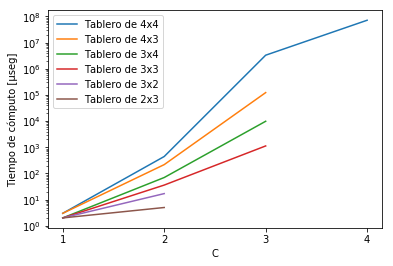

In [19]:
tiempos = np.load('save/tiempos_C_minimax.npy')
CC = [1,2,3,4]
# Format plot
plt.figure()
plt.xticks(CC)
plt.yscale('log')
plt.xlabel('C')
plt.ylabel('Tiempo de cómputo [μseg]')

# Data
plt.plot(CC,tiempos[3][3],label='Tablero de 4x4')
plt.plot(CC,tiempos[3][2],label='Tablero de 4x3')
plt.plot(CC,tiempos[2][3],label='Tablero de 3x4')
plt.plot(CC,tiempos[2][2],label='Tablero de 3x3')
plt.plot(CC,tiempos[2][1],label='Tablero de 3x2')
plt.plot(CC,tiempos[1][2],label='Tablero de 2x3')
plt.legend(loc='best')
plt.savefig('plots/minimax_C.pdf')
plt.show()


# Impacto de M en minimax
Fijar N = 3, C = 3 y variar M

In [ ]:
ai = '-m'
N = 3
C = 3
MM = [3,4,5,6,7]

tiempos = np.zeros(len(MM))

for M in MM:
    tt = []
    for k in range(muestras):
        print(k,end=" ")
        P = N*M
        command = medidor+' '+str(N)+' '+str(M)+' '+str(C)+' '+str(P)
        command+=' -t '+unidad+' '+ai
        tt.append(float(os.popen(command).read()))
    print(command,np.min(tt))
    tiempos[M-3] = np.min(tt)
np.save('save/tiempos_M_minimax.npy',tiempos)



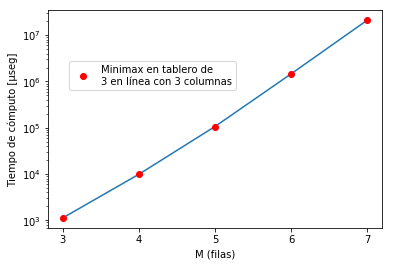

In [18]:
tiempos = np.load('save/tiempos_M_minimax.npy')
MM = [3,4,5,6,7]
# Format plot
plt.figure()
plt.xticks(MM)
plt.yscale('log')
plt.xlabel('M (filas)')
plt.ylabel('Tiempo de cómputo [μseg]')

# Data
plt.plot(MM,tiempos)
plt.plot(MM,tiempos,'ro',label='Minimax en tablero de \n3 en línea con 3 columnas')
plt.legend(loc='center left',bbox_to_anchor=(0.05,0.7))
plt.savefig('plots/minimax_M.pdf')
plt.show()


# Impacto de N en minimax
Fijar M = 4, C = min(M,N) y variar N
Explicar por qué es difícil medir bien esto. Por qué es difícil fijar C, etc.

In [ ]:
ai = '-m'
M = 4
NN = [1,2,3,4]

tiempos = np.zeros(len(NN))

for N in NN:
    tt = []
    for k in range(muestras):
        print(k,end=" ")
        C = min(M,N)
        P = N*M
        command = medidor+' '+str(N)+' '+str(M)+' '+str(C)+' '+str(P)
        command+=' -t '+unidad+' '+ai
        tt.append(float(os.popen(command).read()))
    print(command,np.min(tt))
    tiempos[N-1] = np.min(tt)
np.save('save/tiempos_N_minimax.npy',tiempos)



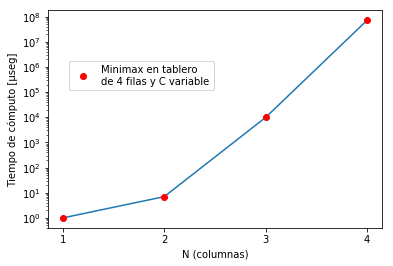

In [15]:
tiempos = np.load('save/tiempos_N_minimax.npy')

NN = [1,2,3,4]
# Format plot
plt.figure()
plt.xticks(NN)
plt.yscale('log')
plt.xlabel('N (columnas)')
plt.ylabel('Tiempo de cómputo [μseg]')

# Data
plt.plot(NN,tiempos)
plt.plot(NN,tiempos,'ro',label='Minimax en tablero \nde 4 filas y C variable')
plt.legend(loc='center left',bbox_to_anchor=(0.05,0.7))
plt.savefig('plots/minimax_N.pdf')
plt.show()


[1, 2, 3]


# Impacto de jugadas previas en minimax
Fijar M,N y C agregar más o menos jugadas previas


In [27]:
ai = '-m'
M = 5
N = 4
C = 3
P = N*M*2

jugadas_previas = [[0,2,0,2,3],[0,1,2,3],[0,1,2],[0,1],[0],[]]
tiempos = np.zeros(len(jugadas_previas))

it = 0
for jj in jugadas_previas:
    tt = []
    for k in range(muestras):
        print(k,end=" ")
        command = medidor+' '+str(N)+' '+str(M)+' '+str(C)+' '+str(P)
        command+=' -t '+unidad+' '+ai+' --jugadas'
        for j in jj:
            command+=' '+str(j)
        tt.append(float(os.popen(command).read()))
    print(command,np.min(tt))
    tiempos[it] = np.min(tt)
    it += 1

np.save('save/tiempos_jugadas_minimax.npy',tiempos)



0 1 2 3 ./tiempos 4 5 3 40 -t micros -m --jugadas 0 2 0 2 3 27468.0
0 1 2 3 ./tiempos 4 5 3 40 -t micros -m --jugadas 0 1 2 3 723479.0
0 1 2 3 ./tiempos 4 5 3 40 -t micros -m --jugadas 0 1 2 1916280.0
0 1 2 3 ./tiempos 4 5 3 40 -t micros -m --jugadas 0 1 5695220.0
0 1 2 3 ./tiempos 4 5 3 40 -t micros -m --jugadas 0 21885700.0
0 1 2 3 ./tiempos 4 5 3 40 -t micros -m --jugadas 81327900.0


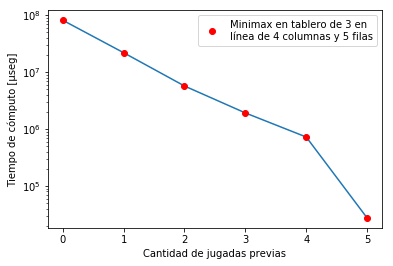

In [14]:
tiempos = np.load('save/tiempos_jugadas_minimax.npy')

cant = [5,4,3,2,1,0]
# Format plot
plt.figure()
plt.xticks(cant)
plt.yscale('log')
plt.xlabel('Cantidad de jugadas previas')
plt.ylabel('Tiempo de cómputo [μseg]')

# Data
plt.plot(cant,tiempos)
plt.plot(cant,tiempos,'ro',label='Minimax en tablero de 3 en \nlínea de 4 columnas y 5 filas')
plt.legend(loc='best')
plt.savefig('plots/minimax_jugadas.pdf')
plt.show()


# Mostrando que alfa-beta es igual de inútil
Fijar M = 4, C = min(M,N) y variar N

In [4]:
ai = '-mab'
M = 4
NN = [1,2,3,4,5]

tiempos = np.zeros(len(NN))

for N in NN:
    tt = []
    for k in range(muestras):
        print(k,end=" ")
        C = min(M,N)
        P = N*M
        command = medidor+' '+str(N)+' '+str(M)+' '+str(C)+' '+str(P)
        command+=' -t '+unidad+' '+ai
        tt.append(float(os.popen(command).read()))
    print(command,np.min(tt))
    tiempos[N-1] = np.min(tt)
np.save('save/tiempos_N_minimax_ab.npy',tiempos)



0 1 2 3 ./tiempos 1 4 1 4 -t micros -mab 2.0
0 1 2 3 ./tiempos 2 4 2 8 -t micros -mab 8.0
0 1 2 3 ./tiempos 3 4 3 12 -t micros -mab 985.0
0 1 2 3 ./tiempos 4 4 4 16 -t micros -mab 45686.0
0 1 2 3 ./tiempos 5 4 4 20 -t micros -mab 16597400.0


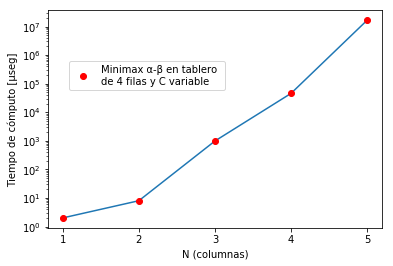

In [20]:
tiempos = np.load('save/tiempos_N_minimax_ab.npy')

NN = [1,2,3,4,5]
# Format plot
plt.figure()
plt.xticks(NN)
plt.yscale('log')
plt.xlabel('N (columnas)')
plt.ylabel('Tiempo de cómputo [μseg]')

# Data
plt.plot(NN,tiempos)
plt.plot(NN,tiempos,'ro',label='Minimax α-β en tablero \nde 4 filas y C variable')
plt.legend(loc='center left',bbox_to_anchor=(0.05,0.7))
plt.savefig('plots/minimax_ab_N.pdf')
plt.show()


[1, 2, 3]
